# RMSD

In [1]:
import numpy as np
import mdtraj as md

work_dir = '/home/chenjf/project/xiaojing/openmm-cmd/examples/07-DHFR-Explicit/'

In [2]:
ref_pdb = md.load(work_dir + 'dhfr.pdb')
top = ref_pdb.topology

heavy_atoms = top.select('!resname HOH && !type H')

## GPU

In [ ]:
# rmsd_gpu = []
# for i in range(100):
#     traj = md.load(work_dir + f'gpu/dhfr_{i+1}.dcd', 
#                    top=work_dir + 'dhfr.pdb')
#     rmsd_gpu.extend(md.rmsd(target=traj, reference=ref_pdb, 
#                             atom_indices=heavy_atoms))

# np.savetxt('rmsd_gpu.txt', rmsd_gpu, fmt='%20.10f')

## GPU double

In [ ]:
# rmsd_gpu = []
# for i in range(100):
#     traj = md.load(work_dir + f'gpu_double/dhfr_{i+1}.dcd', 
#                    top=work_dir + 'dhfr.pdb')
#     rmsd_gpu.extend(md.rmsd(target=traj, reference=ref_pdb, 
#                             atom_indices=heavy_atoms))

# np.savetxt('rmsd_gpu_double.txt', rmsd_gpu, fmt='%20.10f')

## FPGA

In [ ]:
# rmsd_fpga = []
# for i in range(100):
#     traj = md.load(work_dir + f'langchao/dhfr_{i+1}.dcd', 
#                    top=work_dir + 'dhfr.pdb')
#     rmsd_fpga.extend(md.rmsd(target=traj, reference=ref_pdb, 
#                              atom_indices=heavy_atoms))

# np.savetxt('rmsd_fpga.txt', rmsd_fpga, fmt='%20.10f')

In [3]:
rmsd_gpu_sp = np.loadtxt('rmsd_gpu.txt')
rmsd_gpu_dp = np.loadtxt('rmsd_gpu_double.txt')
rmsd_fpga = np.loadtxt('rmsd_fpga.txt')

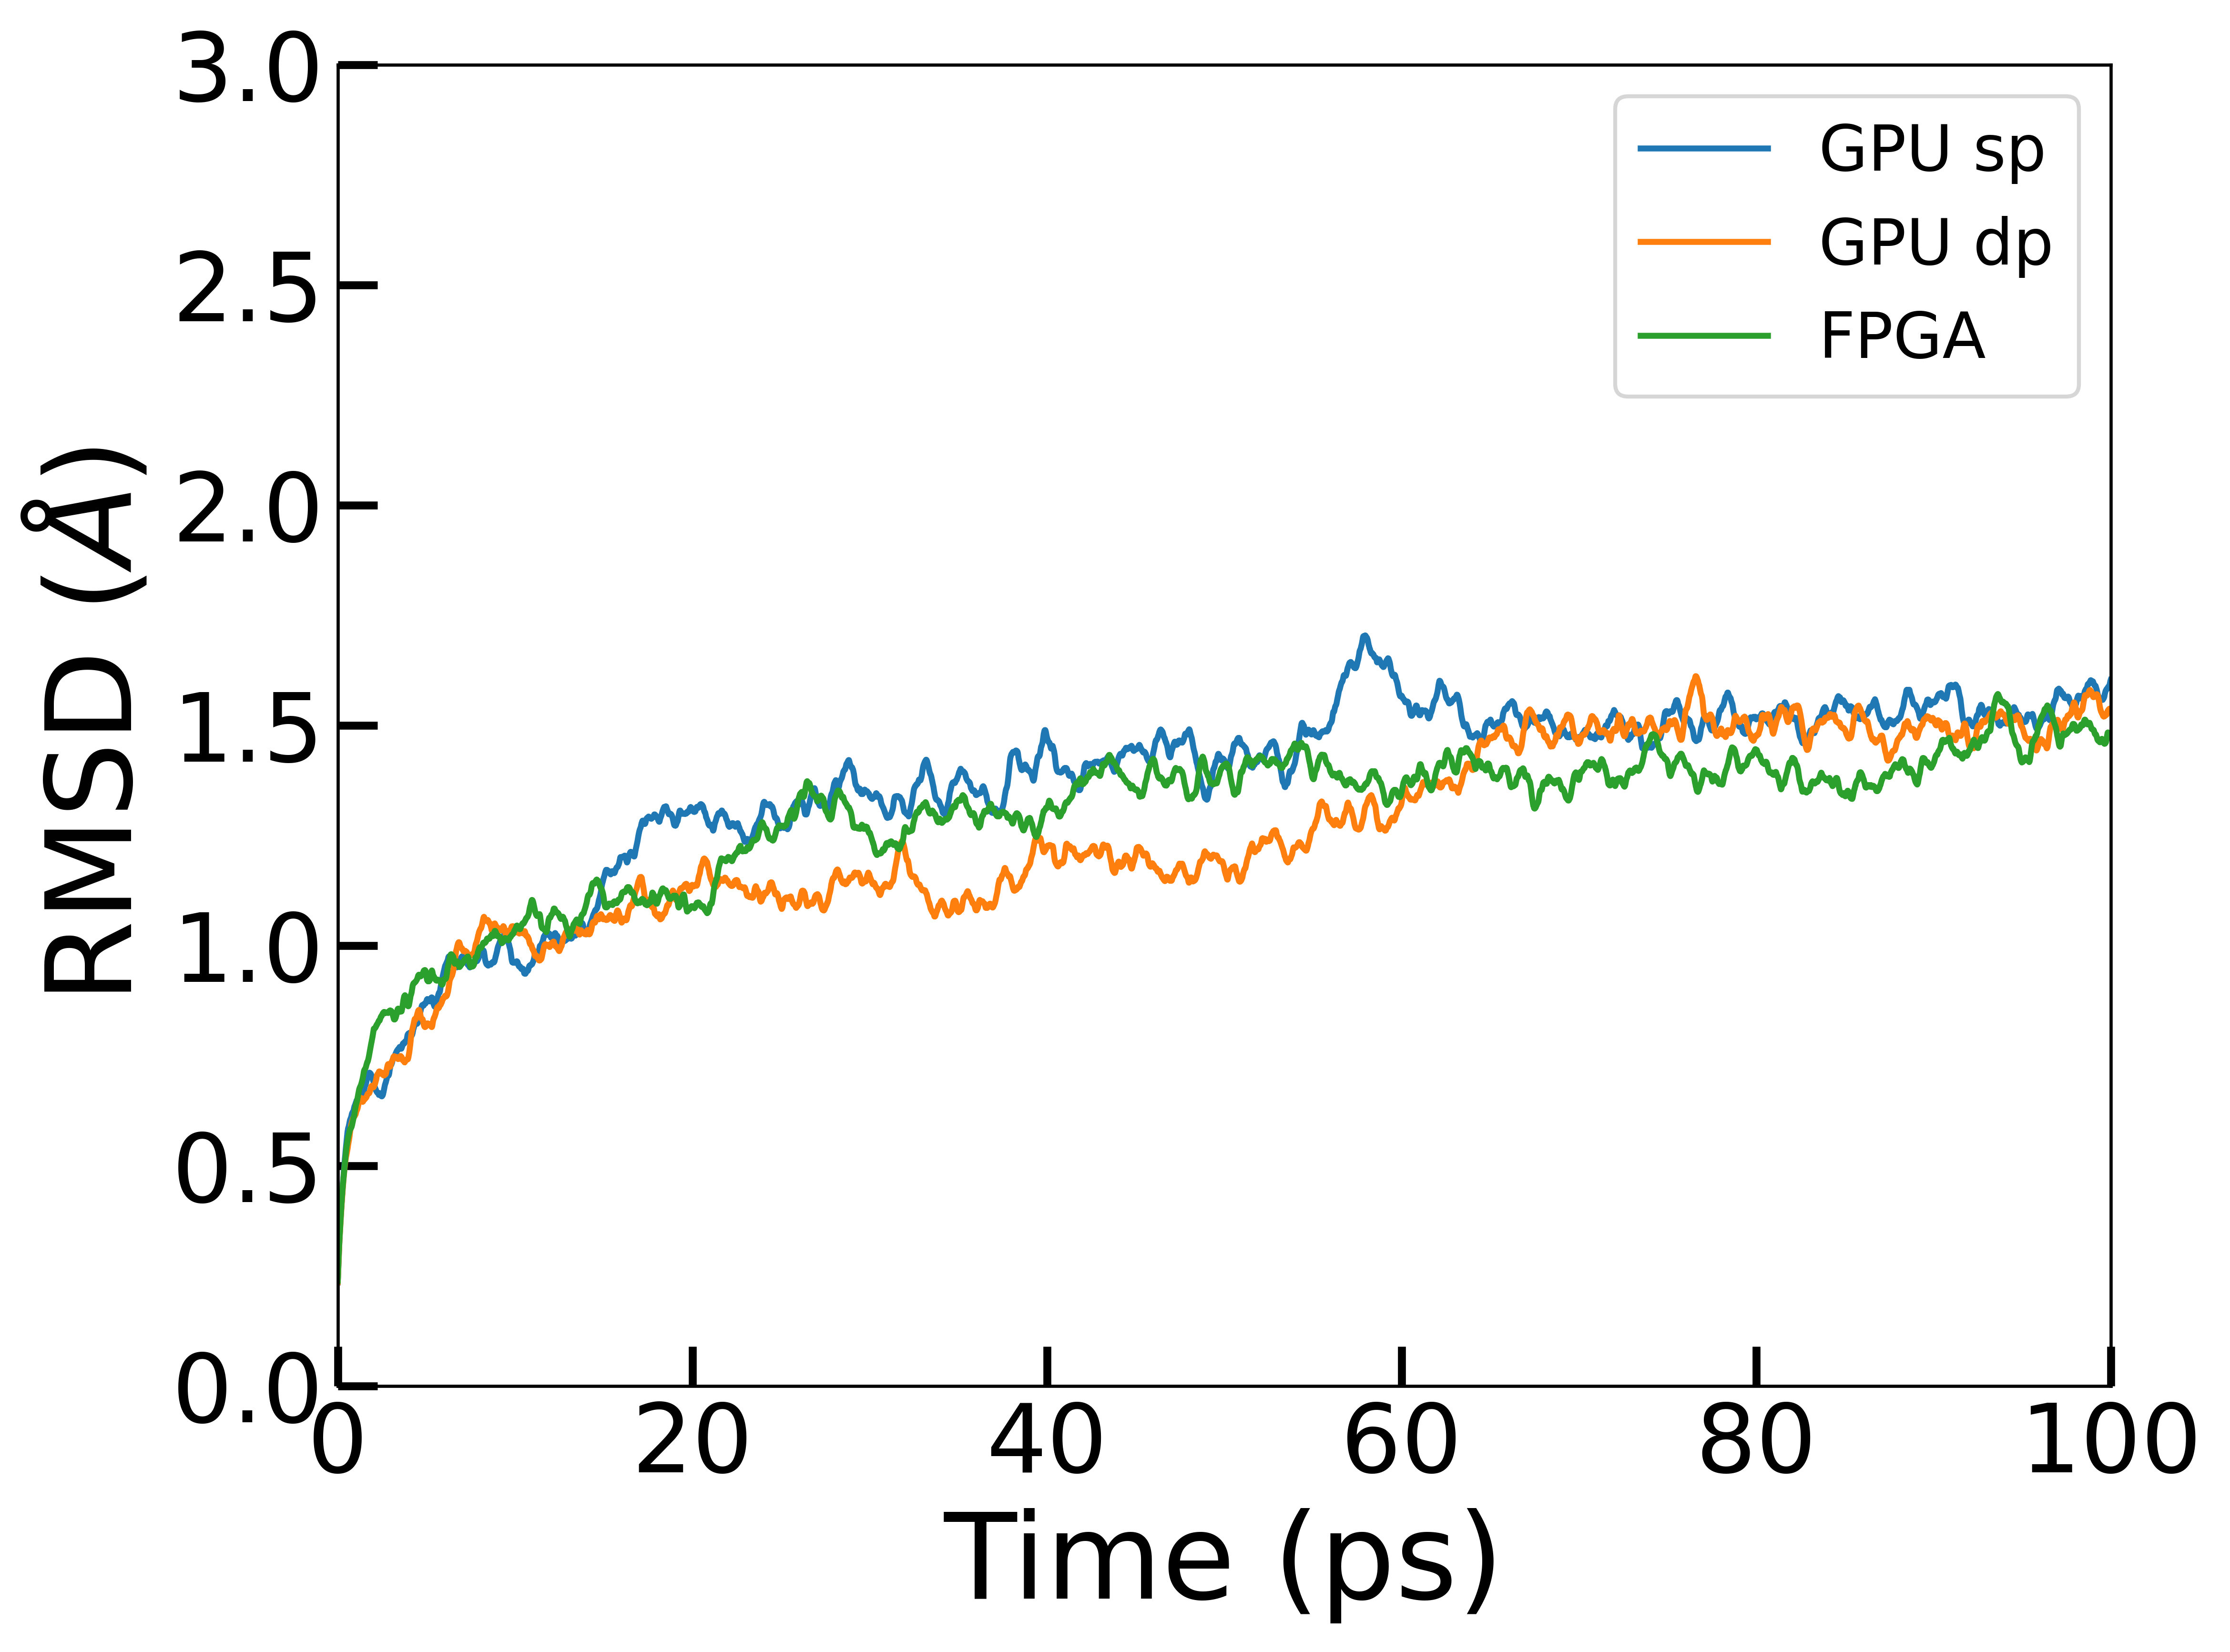

In [16]:
import matplotlib.pyplot as plt

# timestep: 2 fs
x = np.linspace(0, 50, 50_000)
fig, ax = plt.subplots(figsize=(8,6), dpi=600)

ax.plot(2*x, 10*rmsd_gpu_sp, label='GPU sp')
ax.plot(2*x, 10*rmsd_gpu_dp, label='GPU dp')
ax.plot(2*x, 10*rmsd_fpga, label='FPGA')

ax.set_xlabel('Time (ps)', fontsize=30)
ax.set_ylabel(r'RMSD ($\AA$)', fontsize=30)
ax.tick_params(axis='both', labelsize=24, size=10, width=2)

ax.set_xlim(0, 100)
ax.set_ylim(0, 3)

ax.legend(fontsize=16)
#ax.set_title('RMSD of heavy atoms')

plt.show()